In [92]:
import pandas as pd 
import matplotlib.pylab as plt
import numpy as np
from pathlib import Path
import os

In [93]:
df = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/data/TCGA_metadata/clinical.project-tcga-coad.2023-12-06/clinical.tsv",sep="\t")
df.head()

,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
0,01240896-3f3f-4bf9-9799-55c87bfacf36,TCGA-F4-6854,TCGA-COAD,77,'--,'--,'--,'--,-28272,'--,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Pharmaceutical Therapy, NOS"
1,01240896-3f3f-4bf9-9799-55c87bfacf36,TCGA-F4-6854,TCGA-COAD,77,'--,'--,'--,'--,-28272,'--,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
2,01ad5016-f691-4bca-82a0-910429d8d25b,TCGA-AA-3561,TCGA-COAD,72,'--,'--,'--,'--,-26420,'--,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Pharmaceutical Therapy, NOS"
3,01ad5016-f691-4bca-82a0-910429d8d25b,TCGA-AA-3561,TCGA-COAD,72,'--,'--,'--,'--,-26420,'--,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
4,01f493d4-229d-47a6-baa8-32a342c65d01,TCGA-AA-A00O,TCGA-COAD,83,'--,'--,'--,'--,-30316,'--,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Pharmaceutical Therapy, NOS"


In [94]:
df.columns.to_list()

['case_id',
 'case_submitter_id',
 'project_id',
 'age_at_index',
 'age_is_obfuscated',
 'cause_of_death',
 'cause_of_death_source',
 'country_of_residence_at_enrollment',
 'days_to_birth',
 'days_to_death',
 'ethnicity',
 'gender',
 'occupation_duration_years',
 'premature_at_birth',
 'race',
 'vital_status',
 'weeks_gestation_at_birth',
 'year_of_birth',
 'year_of_death',
 'adrenal_hormone',
 'age_at_diagnosis',
 'ajcc_clinical_m',
 'ajcc_clinical_n',
 'ajcc_clinical_stage',
 'ajcc_clinical_t',
 'ajcc_pathologic_m',
 'ajcc_pathologic_n',
 'ajcc_pathologic_stage',
 'ajcc_pathologic_t',
 'ajcc_staging_system_edition',
 'anaplasia_present',
 'anaplasia_present_type',
 'ann_arbor_b_symptoms',
 'ann_arbor_b_symptoms_described',
 'ann_arbor_clinical_stage',
 'ann_arbor_extranodal_involvement',
 'ann_arbor_pathologic_stage',
 'best_overall_response',
 'breslow_thickness',
 'burkitt_lymphoma_clinical_variant',
 'child_pugh_classification',
 'circumferential_resection_margin',
 'classificatio

In [95]:

# Convert relevant columns to numeric, handling non-numeric values
df[['days_to_diagnosis', 'days_to_recurrence', 'days_to_last_follow_up', 'days_to_death']] = \
    df[['days_to_diagnosis', 'days_to_recurrence', 'days_to_last_follow_up', 'days_to_death']].apply(pd.to_numeric, errors='coerce')

# Calculate PFS
df['PFS_days'] = df.apply(
    lambda row: row['days_to_recurrence'] if not pd.isna(row['days_to_recurrence']) 
               else (row['days_to_last_follow_up'] if not pd.isna(row['days_to_last_follow_up']) 
                     else row['days_to_death']), axis=1)

# Now, 'clinical_data' contains a new column 'PFS_days' with the calculated PFS


In [96]:
df["PFS_days"].to_list()

[16.0,
 16.0,
 424.0,
 424.0,
 822.0,
 822.0,
 1094.0,
 1094.0,
 518.0,
 518.0,
 1096.0,
 1096.0,
 943.0,
 943.0,
 580.0,
 580.0,
 914.0,
 914.0,
 389.0,
 389.0,
 1064.0,
 1064.0,
 1321.0,
 1321.0,
 578.0,
 578.0,
 518.0,
 518.0,
 276.0,
 276.0,
 30.0,
 30.0,
 308.0,
 308.0,
 30.0,
 30.0,
 419.0,
 419.0,
 1456.0,
 1456.0,
 31.0,
 31.0,
 549.0,
 549.0,
 373.0,
 373.0,
 888.0,
 888.0,
 31.0,
 31.0,
 662.0,
 662.0,
 370.0,
 370.0,
 1366.0,
 1366.0,
 1186.0,
 1186.0,
 1157.0,
 1157.0,
 0.0,
 0.0,
 489.0,
 489.0,
 49.0,
 49.0,
 913.0,
 913.0,
 608.0,
 608.0,
 346.0,
 346.0,
 974.0,
 974.0,
 0.0,
 0.0,
 155.0,
 155.0,
 427.0,
 427.0,
 1935.0,
 1935.0,
 1004.0,
 1004.0,
 791.0,
 791.0,
 1127.0,
 1127.0,
 596.0,
 596.0,
 379.0,
 379.0,
 2175.0,
 2175.0,
 761.0,
 761.0,
 488.0,
 488.0,
 485.0,
 485.0,
 580.0,
 580.0,
 1006.0,
 1006.0,
 3974.0,
 3974.0,
 1442.0,
 1442.0,
 167.0,
 167.0,
 2310.0,
 2310.0,
 0.0,
 0.0,
 0.0,
 0.0,
 734.0,
 734.0,
 915.0,
 915.0,
 2268.0,
 2268.0,
 0.0,
 0.0,
 995.0

/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


794.5655021834061

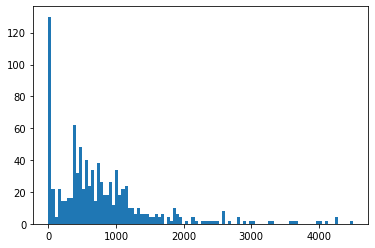

In [97]:
plt.hist(df["PFS_days"],bins=100)
np.mean(df["PFS_days"])

#### Check mean of multiplexed PFS is similr so calculation is trustworthy!

In [98]:
multi_meta = pd.read_excel("/mnt/ncshare/ozkilim/BRCA/data/multiplexed_metadata/1-s2.0-S0092867422015719-mmc1.xlsx",header=1)
multi_meta.head()

,Patient,Sex,Age,Histology,Anatomic site,Clinical Assigned Histologic Grade,Perineural invasion (PNI),Lymphatic invasion (LVI),Stage,Progression-free survival (days)
0,CRC1,Male,69,Mixed mucinous and signet ring cell adenocarci...,Cecum,High Grade,No,Yes,IIIB,365
1,CRC2,Male,69,"Adenocarcinoma, with Mucinous Features",Rectum,Low Grade,Yes,No,IIA,397
2,CRC3,Female,40,Adenocarcinoma,Sigmoid colon,Low Grade,Yes,Yes,IIIB,448
3,CRC4,Male,58,Adenocarcinoma,Sigmoid colon,Low Grade,Yes,No,IIA,445
4,CRC5,Male,56,Adenocarcinoma,Rectosigmoid junction,High Grade,No,Yes,IIIB,459


In [99]:
multi_meta = multi_meta[multi_meta['Progression-free survival  (days)'] != 'Not reported']


np.mean(multi_meta['Progression-free survival  (days)'].astype(int))

973.8953488372093

(array([17.,  9.,  7.,  6.,  4.,  5., 17., 11.,  7.,  3.]),
 array([   5. ,  222.7,  440.4,  658.1,  875.8, 1093.5, 1311.2, 1528.9,
        1746.6, 1964.3, 2182. ]),
 <BarContainer object of 10 artists>)

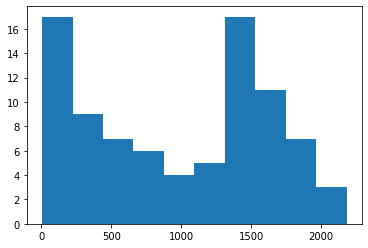

In [100]:
plt.hist(multi_meta['Progression-free survival  (days)'].astype(int))

In [101]:
# prepare dataset for task. Pick cutoff for binary classification.
import pandas as pd

# Assuming 'df' is your dataframe and 'PFS_days' is the column with PFS scores

# Calculate the median
median_pfs = df['PFS_days'].median()

# Apply the median as a threshold to create a new binary column
# Patients with PFS less than the median are classified as 1, and those with PFS greater than or equal to the median as 0
df['PFS_binary'] = (df['PFS_days'] < median_pfs).astype(int)

In [102]:
df.columns.to_list()


# now simplify to create df with case id and then mergre lisdes to make task! 
#stage?...treatment responce?..

['case_id',
 'case_submitter_id',
 'project_id',
 'age_at_index',
 'age_is_obfuscated',
 'cause_of_death',
 'cause_of_death_source',
 'country_of_residence_at_enrollment',
 'days_to_birth',
 'days_to_death',
 'ethnicity',
 'gender',
 'occupation_duration_years',
 'premature_at_birth',
 'race',
 'vital_status',
 'weeks_gestation_at_birth',
 'year_of_birth',
 'year_of_death',
 'adrenal_hormone',
 'age_at_diagnosis',
 'ajcc_clinical_m',
 'ajcc_clinical_n',
 'ajcc_clinical_stage',
 'ajcc_clinical_t',
 'ajcc_pathologic_m',
 'ajcc_pathologic_n',
 'ajcc_pathologic_stage',
 'ajcc_pathologic_t',
 'ajcc_staging_system_edition',
 'anaplasia_present',
 'anaplasia_present_type',
 'ann_arbor_b_symptoms',
 'ann_arbor_b_symptoms_described',
 'ann_arbor_clinical_stage',
 'ann_arbor_extranodal_involvement',
 'ann_arbor_pathologic_stage',
 'best_overall_response',
 'breslow_thickness',
 'burkitt_lymphoma_clinical_variant',
 'child_pugh_classification',
 'circumferential_resection_margin',
 'classificatio

In [103]:
# def get_svs_filenames(directory):
#     # List to store filenames
#     filenames = []
#     # Loop through all files in the directory
#     for file in os.listdir(directory):
#         # Check if the file is an .svs file
#         if file.endswith(".svs"):
#             filenames.append(file)

#     return filenames

# # Replace 'your_directory_path' with the path to your directory
# directory_path = '/tank/WSI_data/TCGA_WSI_organized/TCGA-COAD/slides/'
# svs_filenames = get_svs_filenames(directory_path)

In [104]:
generic_endpoints = pd.read_excel('/mnt/ncshare/ozkilim/BRCA/data/TCGA_metadata/TCGA-CDR-SupplementalTableS1.xlsx',sheet_name="ExtraEndpoints") # Uncomment this if you're reading from a CSV
generic_endpoints.head()

,Unnamed: 0,bcr_patient_barcode,type,PFI.1,PFI.time.1,PFI.2,PFI.time.2,PFS,PFS.time,DSS_cr,DSS.time.cr,DFI.cr,DFI.time.cr,PFI.cr,PFI.time.cr,PFI.1.cr,PFI.time.1.cr,PFI.2.cr,PFI.time.2.cr
0,1,TCGA-OR-A5J1,ACC,1.0,754.0,1.0,754.0,1.0,754.0,1.0,1355.0,1.0,754.0,1.0,754.0,1.0,754.0,1.0,754.0
1,2,TCGA-OR-A5J2,ACC,1.0,289.0,1.0,289.0,1.0,289.0,1.0,1677.0,NaN,NaN,1.0,289.0,1.0,289.0,1.0,289.0
2,3,TCGA-OR-A5J3,ACC,1.0,53.0,1.0,53.0,1.0,53.0,0.0,2091.0,1.0,53.0,1.0,53.0,1.0,53.0,1.0,53.0
3,4,TCGA-OR-A5J4,ACC,1.0,126.0,1.0,126.0,1.0,126.0,1.0,423.0,NaN,NaN,1.0,126.0,1.0,126.0,1.0,126.0
4,5,TCGA-OR-A5J5,ACC,1.0,50.0,1.0,50.0,1.0,50.0,1.0,365.0,NaN,NaN,1.0,50.0,1.0,50.0,1.0,50.0


In [105]:
import pandas as pd
import os

# Path to the folder containing the files
folder_path = '/tank/WSI_data/TCGA_WSI_organized/TCGA-COAD/CLAM/level_0/ViT/h5_files'

# List all filenames in the folder
filenames = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]


# Extract the relevant part of the filename (adjust this based on your filename structure)
# Assuming the bcr_patient_barcode is at the start of the filename, followed by a delimiter like '-'
extracted_identifiers = ['-'.join(filename.split('.')[0].split('-')[:3]) for filename in filenames]

slide_ids = [f[:-3] for f in filenames]

# Create a new DataFrame from filenames
file_df = pd.DataFrame({'slide_id': slide_ids, 'bcr_patient_barcode': extracted_identifiers})

# Merge the new DataFrame with the existing one
# This ensures that all filenames are included and matched data from the original DataFrame is added
merged_df = file_df.merge(generic_endpoints, on='bcr_patient_barcode', how='left')

In [106]:
merged_df.head(50)

# Binarize but have onother set. 

median_pfs = merged_df['PFS.time'].median()
print(median_pfs)
# Apply the median as a threshold to create a new binary column
# Patients with PFS less than the median are classified as 1, and those with PFS greater than or equal to the median as 0
merged_df['PFS_binary'] = (merged_df['PFS.time'] < median_pfs).astype(int) # 6 month PFS? ... what is clincally viable?...  

merged_df.rename(columns={'bcr_patient_barcode': 'case_id'}, inplace=True)

COAD_task = merged_df[['case_id', 'slide_id', 'PFS.time','PFS_binary']]

580.0


In [107]:
# COAD_task.to_csv("/mnt/ncshare/ozkilim/BRCA/data/tasks/COAD_PFS.csv",index=None)

<AxesSubplot:>

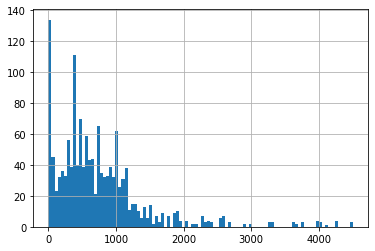

In [108]:
# 6 month pfs?
COAD_task["PFS.time"].hist(bins=100) 

In [109]:
# create a subset tht is only FFPE slides. 

COAD_task.head()



,case_id,slide_id,PFS.time,PFS_binary
0,TCGA-CM-6164,TCGA-CM-6164-01A-01-TS1.60a901bc-cc58-4ea8-981...,883.0,0
1,TCGA-DM-A1D8,TCGA-DM-A1D8-01A-01-TSA.06a8b947-9f47-4186-915...,383.0,1
2,TCGA-AZ-6603,TCGA-AZ-6603-01A-01-TS1.980f8750-f6ee-4983-84a...,899.0,0
3,TCGA-AA-3877,TCGA-AA-3877-01A-01-BS1.4c560d4b-e341-4859-a93...,943.0,0
4,TCGA-AA-3870,TCGA-AA-3870-01A-01-TS1.bc40da97-d23a-442f-9fd...,912.0,0


In [110]:
COAD_task['slide_type'] = COAD_task['slide_id'].str.split('-').str[5].apply(lambda x: x.split('.')[0])
COAD_task

/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,case_id,slide_id,PFS.time,PFS_binary,slide_type
0,TCGA-CM-6164,TCGA-CM-6164-01A-01-TS1.60a901bc-cc58-4ea8-981...,883.0,0,TS1
1,TCGA-DM-A1D8,TCGA-DM-A1D8-01A-01-TSA.06a8b947-9f47-4186-915...,383.0,1,TSA
2,TCGA-AZ-6603,TCGA-AZ-6603-01A-01-TS1.980f8750-f6ee-4983-84a...,899.0,0,TS1
3,TCGA-AA-3877,TCGA-AA-3877-01A-01-BS1.4c560d4b-e341-4859-a93...,943.0,0,BS1
4,TCGA-AA-3870,TCGA-AA-3870-01A-01-TS1.bc40da97-d23a-442f-9fd...,912.0,0,TS1
...,...,...,...,...,...
1435,TCGA-AA-3972,TCGA-AA-3972-01A-01-TS1.3492c5d3-141f-48f9-a61...,1216.0,0,TS1
1436,TCGA-F4-6569,TCGA-F4-6569-01A-01-BS1.8a1db85e-ba2c-40d4-a19...,1087.0,0,BS1
1437,TCGA-D5-5540,TCGA-D5-5540-01Z-00-DX1.4e4c69ca-f736-4db3-a40...,1706.0,0,DX1
1438,TCGA-CA-6717,TCGA-CA-6717-01Z-00-DX1.08da75b7-a08f-46b3-a8c...,388.0,1,DX1


In [111]:
COAD_task['slide_type'].value_counts()

COAD_task_FFPE = COAD_task[COAD_task['slide_type'] == 'DX1']

COAD_task_FFPE.to_csv("/mnt/ncshare/ozkilim/BRCA/data/tasks/COAD_PFS_FFPE.csv",index=None)